# 01 - Data Exploration

This notebook covers all exploration work:
1. Load and profile the Vickers & Vertosick (2016) dataset
2. EDA — distributions, relationships, and visualizations
3. Profile the Afonseca et al. training dataset

**Primary dataset:** Vickers & Vertosick — 2,303 recreational runners with self-reported training and race times.  
**Secondary dataset:** Afonseca et al. — 10.7M training records from 36,412 World Marathon Majors runners.

## Setup

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from src.data_loading import load_vickers

sns.set_theme(style='whitegrid')
%matplotlib inline

---
## Part 1: Vickers Dataset - Loading and Profile

Load and check shape

In [3]:
df = load_vickers()
print(f'Shape: {df.shape}')
df.dtypes.to_frame('dtype')

Shape: (2303, 50)


,dtype
id,int64
adjusted,int64
age,float64
bmi,float64
cohort1,float64
cohort2,float64
cohort3,float64
cohort4,float64
endurancecat,int64
endurancespeed,int64


Ok, all int64 and float64. I know that some of these columns are still categorical based on the docs though. 

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2303.0,1154.437256,667.163997,1.000000,577.500000,1153.000000,1732.500000,2311.000000
adjusted,2303.0,0.939644,0.238197,0.000000,1.000000,1.000000,1.000000,1.000000
age,2303.0,36.421407,9.913292,16.000000,29.000000,35.000000,42.000000,74.000000
bmi,2303.0,23.745838,3.052466,15.428386,21.704651,23.374725,25.231911,47.184647
cohort1,929.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
cohort2,633.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
cohort3,493.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
cohort4,387.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
endurancecat,2303.0,1.833695,0.656222,1.000000,1.000000,2.000000,2.000000,4.000000
endurancespeed,2303.0,3.440729,1.768493,1.000000,2.000000,3.000000,4.000000,10.000000


Mean mileage per week was 32 miles, but standard deviation was 17 miles. This means we had significant variaition in mileage ran per week. I should look over that more closely when I do thorough EDA.

In [15]:
df.isnull().sum().to_frame("null count")

,null count
id,0
adjusted,0
age,0
bmi,0
cohort1,1374
cohort2,1670
cohort3,1810
cohort4,1916
endurancecat,0
endurancespeed,0


Interesting. The most submitted race was the half-marathon followed by the 5k, with the least submitted races being the 5 mile and the 10 mile. Approximately 40% of runners submitted a marathon time, which is promising. Lets see how many of these marathon runners have other race times logged. 

In [ ]:
# Count number of marathoners with 1 and 2 other races submitted
has_marathon = df[df["mf_ti_adj"].notna()]

race_cols = ["k5_ti_adj", "k10_ti_adj", "m5_ti_adj", "m10_ti_adj", "mh_ti_adj"]
has_marathon["other_races"] = has_marathon[race_cols].notna().sum(axis=1)

has_marathon["other_races"].value_counts().sort_index().to_frame("# of other races")

,# of other races
other_races,
1,436
2,493


Alright, so we have 493 runners who have an adjusted marathon time, who also ran two other races with adjusted times. That shaves n down significantly. Lets quickly assign a variable for the data we want to use.

In [28]:
useable_data = has_marathon[has_marathon["other_races"] == 2]

### Data quality checks

I'm looking for dupes and negatives, along with impossible values. All of this was self reported to a magazine, so I want to be diligent.

In [21]:
# Duplicates
print(f'Duplicate rows: {df.duplicated().sum()}')

Duplicate rows: 0


In [ ]:
# impossible values
impossible = df[(df["mf_ti_adj"] < 120) | (df["mf_ti_adj"] > 480)]
print(f"Total impossible vals: {len(impossible)}")


Total impossible vals: 0


Awesome. No impossible values. Vickers et al. Almost certainly cleaned this data before they used it, but its always good to check.

### Vickers profiling summary

We have 493 useable datapoints, which should be a decent amount for our purposes. Our data seems pretty clean already. We have no dupe rows and no impossible marathon values in our data. Based on this, its worth exploring the data further. I want to inspect the distribution of training volume, since thats a major feature. Its also worth inspecting what values are null in the data we will be working with to make sure theres no systemic issues. Further EDA is called for next.

---
## Part 2: Vickers EDA - Distributions and Relationships

### Marathon finish time distribution

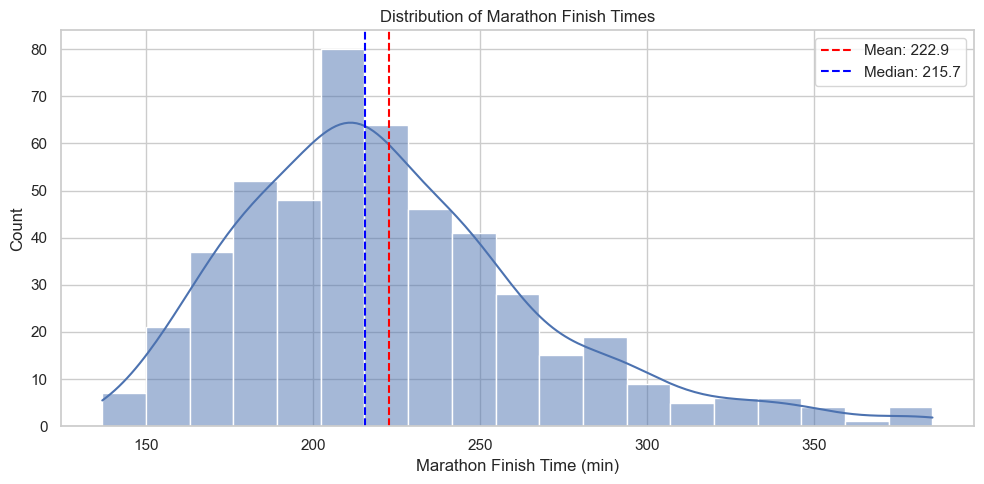

In [ ]:
# Histogram of marathon finish times
marathon_mean_val = round(useable_data["mf_ti_adj"].mean(), 1)
marathon_median_val = round(useable_data["mf_ti_adj"].median(), 1)

fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(useable_data['mf_ti_adj'], kde=True, ax=ax)
ax.set_xlabel('Marathon Finish Time (min)')
ax.set_title('Distribution of Marathon Finish Times')
plt.axvline(useable_data["mf_ti_adj"].mean(), color='red', linestyle="--", label=f'Mean: {marathon_mean_val}')
plt.axvline(useable_data["mf_ti_adj"].median(), color='blue', linestyle="--", label=f'Median: {marathon_median_val}')
plt.legend()
plt.tight_layout()
plt.savefig('../results/figures/marathon_time_dist.png', dpi=150)

Marathon times look gamma distributed and without outliers. The mean and median are close together and right around 220 minutes, or a 3:40 marathon. This is in line with marathon statistics I've seen before, which is a good sign. 3:40 is not elite neither is it slow. This gives me confidence that a model trained on this data will give a generalizable result.

### Weekly mileage distribution of Marathon Runners

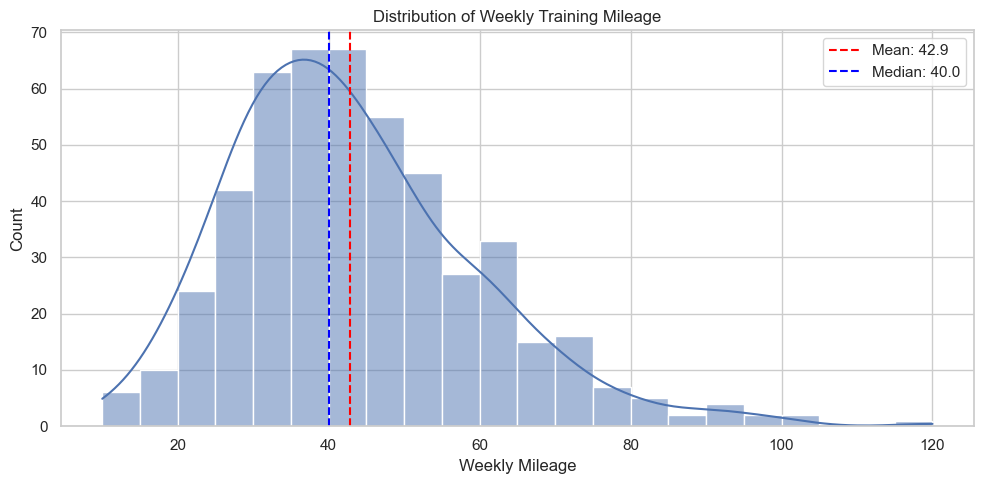

In [ ]:
# Histogram of weekly mileage
weekly_mean_val = round(useable_data["typical"].mean(), 1)
weekly_median_val = round(useable_data["typical"].median(), 1)

fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(useable_data['typical'], kde=True, ax=ax)
plt.axvline(useable_data["typical"].mean(), color='red', linestyle="--", label=f'Mean: {weekly_mean_val}')
plt.axvline(useable_data["typical"].median(), color='blue', linestyle="--", label=f'Median: {weekly_median_val}')
plt.legend()
ax.set_xlabel('Weekly Mileage')
ax.set_title('Distribution of Weekly Training Mileage')
plt.tight_layout()
plt.savefig('../results/figures/weekly_mileage_dist.png', dpi=150)

Typical weekly mileage is also gamma distributed, which makes sense based off of the marathon data. Statistically speaking, we might have an outlier at 120. I mean, anyone who is typically running 120 miles a week is an outlier, thats not up for dispute. Mean and median for weekly mileage are also pretty close together in the low 40's. This is slightly above what I expect the average person training for a marathon to do. Most people will do a good number of weeks in the mid 30's, maybe a week or two at 40. Spending most weeks around 40 is more characteristic of people who have ran marathons before. This tells me that we are working with a subset of people who may be more experienced than the average marathoner.

### Core relationship: weekly mileage vs marathon time

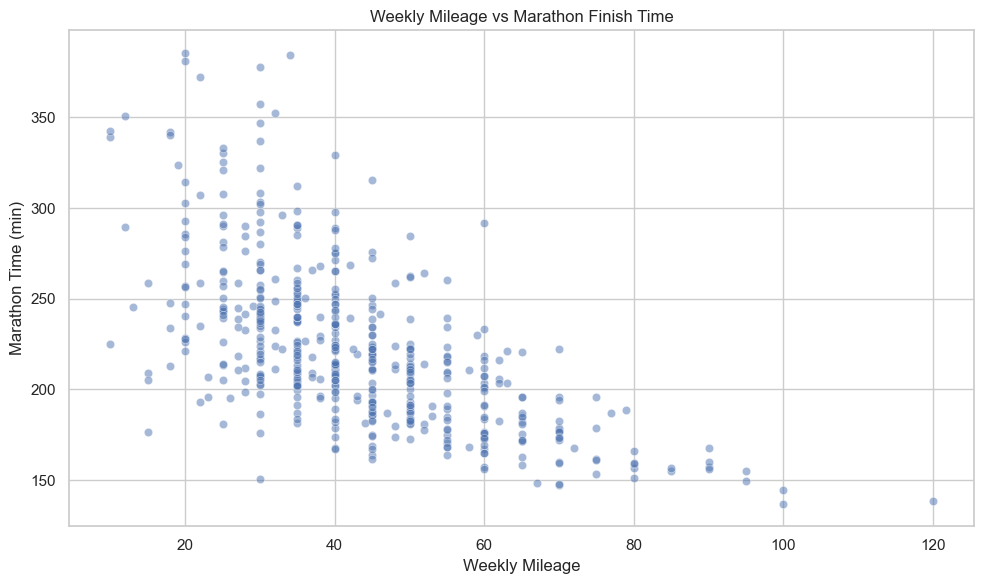

In [ ]:
# Scatter plot of mileage vs marathon time
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=useable_data, x='typical', y='mf_ti_adj', alpha=0.5, ax=ax)
ax.set_xlabel('Weekly Mileage')
ax.set_ylabel('Marathon Time (min)')
ax.set_title('Weekly Mileage vs Marathon Finish Time')
plt.tight_layout()
plt.savefig('../results/figures/mileage_vs_marathon.png', dpi=150)

Outside the context of this project, if you asked me to predict someone's marathon time off of one non-race variable, I would always choose weekly mileage. It is the main driver for increasing mitochondrial density in skeletal muscle, which is what allows people to run for so long without experienceing muscular fatigue; the primary metabolic factor tested by a marathon.

Inside the context of this project, we can still see that strong negative correlation I would expect. Runners who typically run 60 miles a week tend to run their marathons ~40 minutes faster than runners who typically run 40 miles a week. It does seem like this relationship is now purely linear, as increases in mileage look to have diminishing returns.

Regardless of this, I would wager that typical mileage will be the best predictor for marathon time aside from race results.

### Other races submitted by marathoners in our pruned data

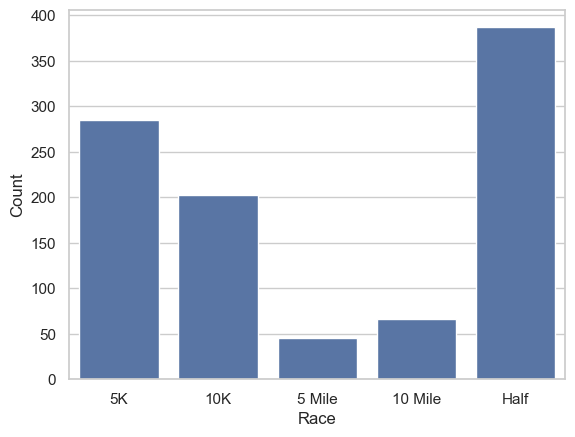

Percentage of runners in our dataset who submitted a halfie: 0.785


<Figure size 640x480 with 0 Axes>

In [50]:
# Count of other races submitted in our subset
race_counts = useable_data[race_cols].notna().sum()
race_counts.index = ["5K", "10K", "5 Mile", "10 Mile", "Half"]
sns.barplot(x=race_counts.index, y=race_counts.values)
plt.xlabel("Race")
plt.ylabel("Count")
plt.show()
plt.savefig('../results/figures/other_races_count.png', dpi=150)

print(f'Percentage of runners in our dataset who submitted a halfie: {round(useable_data['mh_ti_adj'].notna().sum() / useable_data['mf_ti_adj'].notna().sum(), 3)}')

Half marathons were by far the most submitted race. 5k's come second, but I suspect thats because 10k's, 5m's and 10m's are no where near as popular to run as 5k's. The useful takeaway here is that ~78.5% of runners in our dataset submitted a half marathon, which means that intersection is a relatively complete section of our data.

### Half marathon time vs marathon time

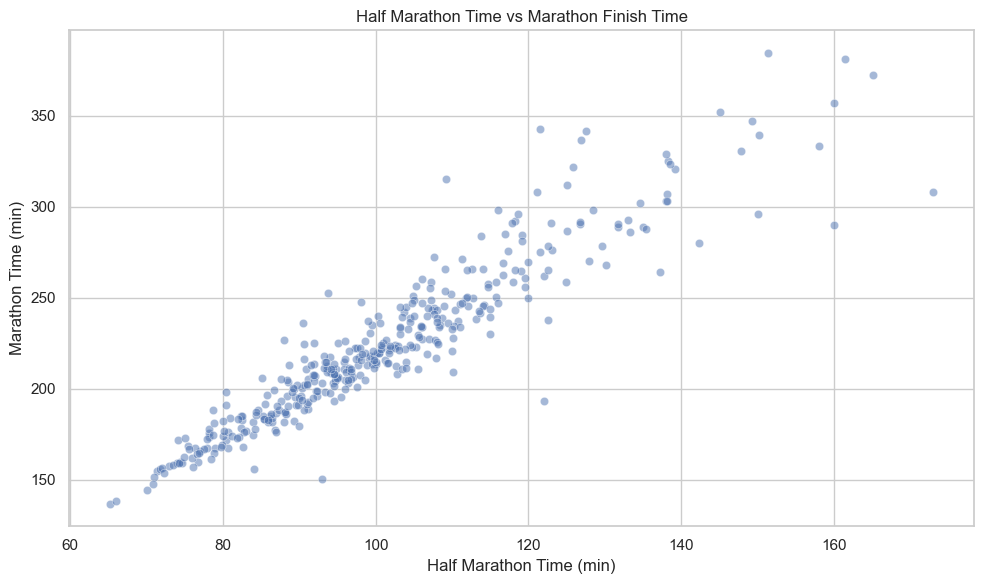

In [ ]:
# Scatter plot of halfie vs full
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=useable_data, x='mh_ti_adj', y='mf_ti_adj', alpha=0.5, ax=ax)
ax.set_xlabel('Half Marathon Time (min)')
ax.set_ylabel('Marathon Time (min)')
ax.set_title('Half Marathon Time vs Marathon Finish Time')
plt.tight_layout()
plt.savefig('../results/figures/half_vs_marathon.png', dpi=150)

There is an obvious strong positive correlation between half marathon finish time and marathon finish time. Theres an obvious linear pattern that looks like it fits with some values that might even be outliers. This looks like a very promising predictor.

### Marathon time by sex and age group

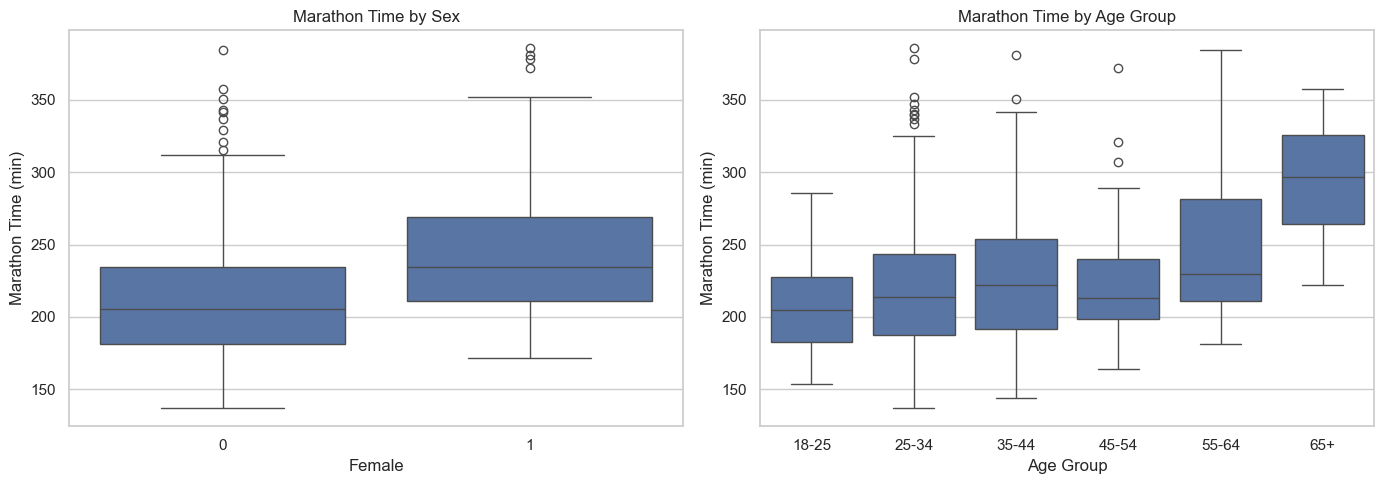

In [58]:
# Box plot of marathon time by sex
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(data=useable_data, x='female', y='mf_ti_adj', ax=axes[0])
axes[0].set_title('Marathon Time by Sex')
axes[0].set_xlabel("Female")
axes[0].set_ylabel("Marathon Time (min)")

# Box plot of marathon time by age group 
useable_data["age_group"] = pd.cut(useable_data["age"], bins=[18, 25, 35, 45, 55, 65, 100],
                                    labels=["18-25", "25-34", "35-44", "45-54", "55-64", "65+"])
sns.boxplot(data=useable_data, x='age_group', y='mf_ti_adj', ax=axes[1])
axes[1].set_title('Marathon Time by Age Group')
axes[1].set_xlabel("Age Group")
axes[1].set_ylabel("Marathon Time (min)")
plt.tight_layout()
plt.savefig('../results/figures/marathon_by_demographics.png', dpi=150)

Comparing male and female results, female marathon runners seem to be distrubuted similarly to male runners, just ~30 minutes slower across the board. Age groups predictably get slower over time, except for the 45-54 age group, which not only gets faster but curiously has the tightest distribution of any age group. The ranges here are really wide and one result could easily come from a multitude of age ranges so age looks like a weak predictor. Sex also looks like a very mild predictor aswell.

### Correlation heatmap

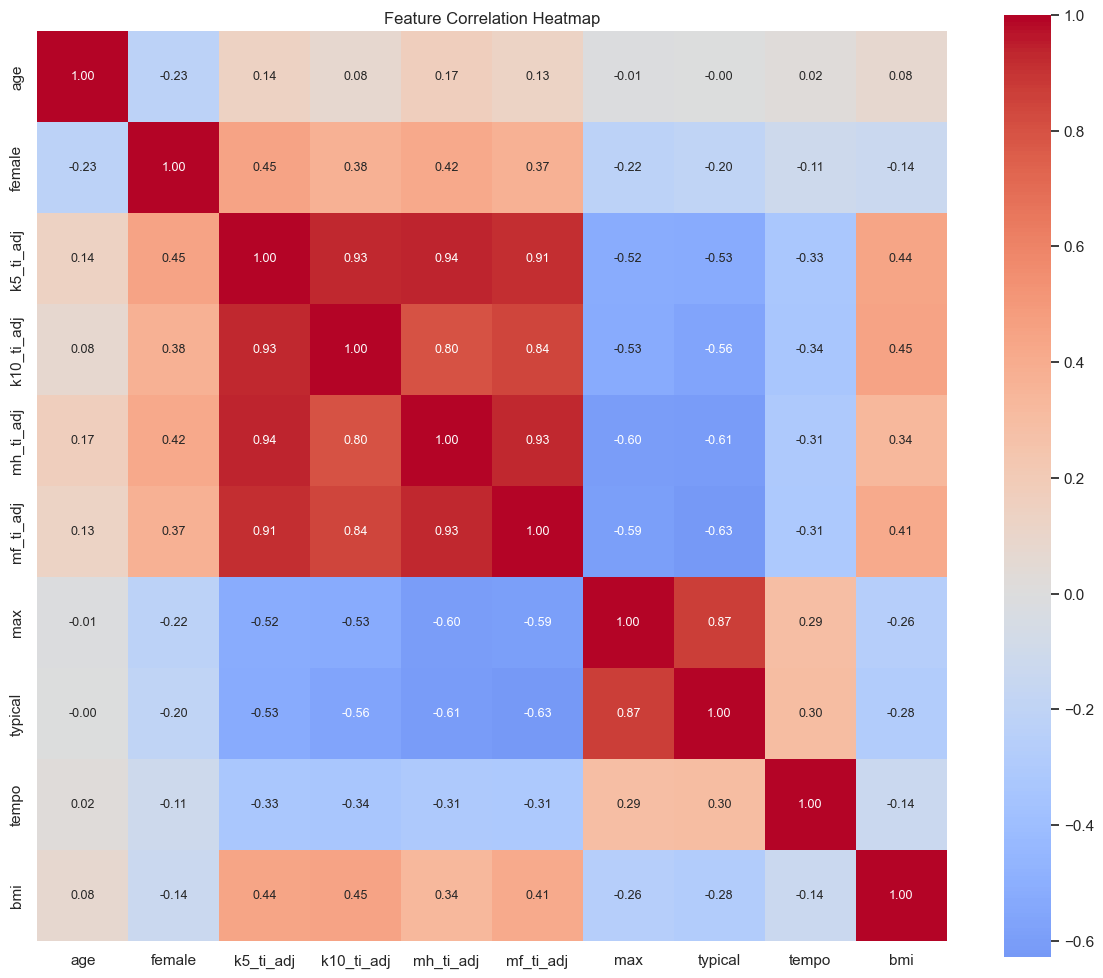

In [67]:
# Correlation heatmap of all numeric features
key_cols = ["age", "female", "k5_ti_adj", "k10_ti_adj", "mh_ti_adj", "mf_ti_adj", "max", "typical", "tempo", "bmi"]

fig, ax = plt.subplots(figsize=(12, 10))
corr = useable_data[key_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            ax=ax, annot_kws={"size": 9}, square=True)
ax.set_title('Feature Correlation Heatmap')
plt.tight_layout()
plt.savefig('../results/figures/correlation_heatmap.png', dpi=150)

All races are very strong correlated (~0.9) with the marathon. The half marathon has the highest correlation of any measured variable at r=0.93. This is intuitive, results from a max-effort event says a lot about a runners current fitness. If I choose to use more than 1 race to predict I'll probably have to do something to account for multicollinearity. 

Aside from races, typical mileage is the strongest non-race predictor (r=-0.63), followed by max (r=-0.59). These variables are strong, but also have a redundancy issue as well. The next most relevant predictors are bmi (r=0.41), female (r=0.37) and tempo (r=-0.31). These predictors aren't the strongest, but there what we've got. 

### Scatter matrix of top continuous features

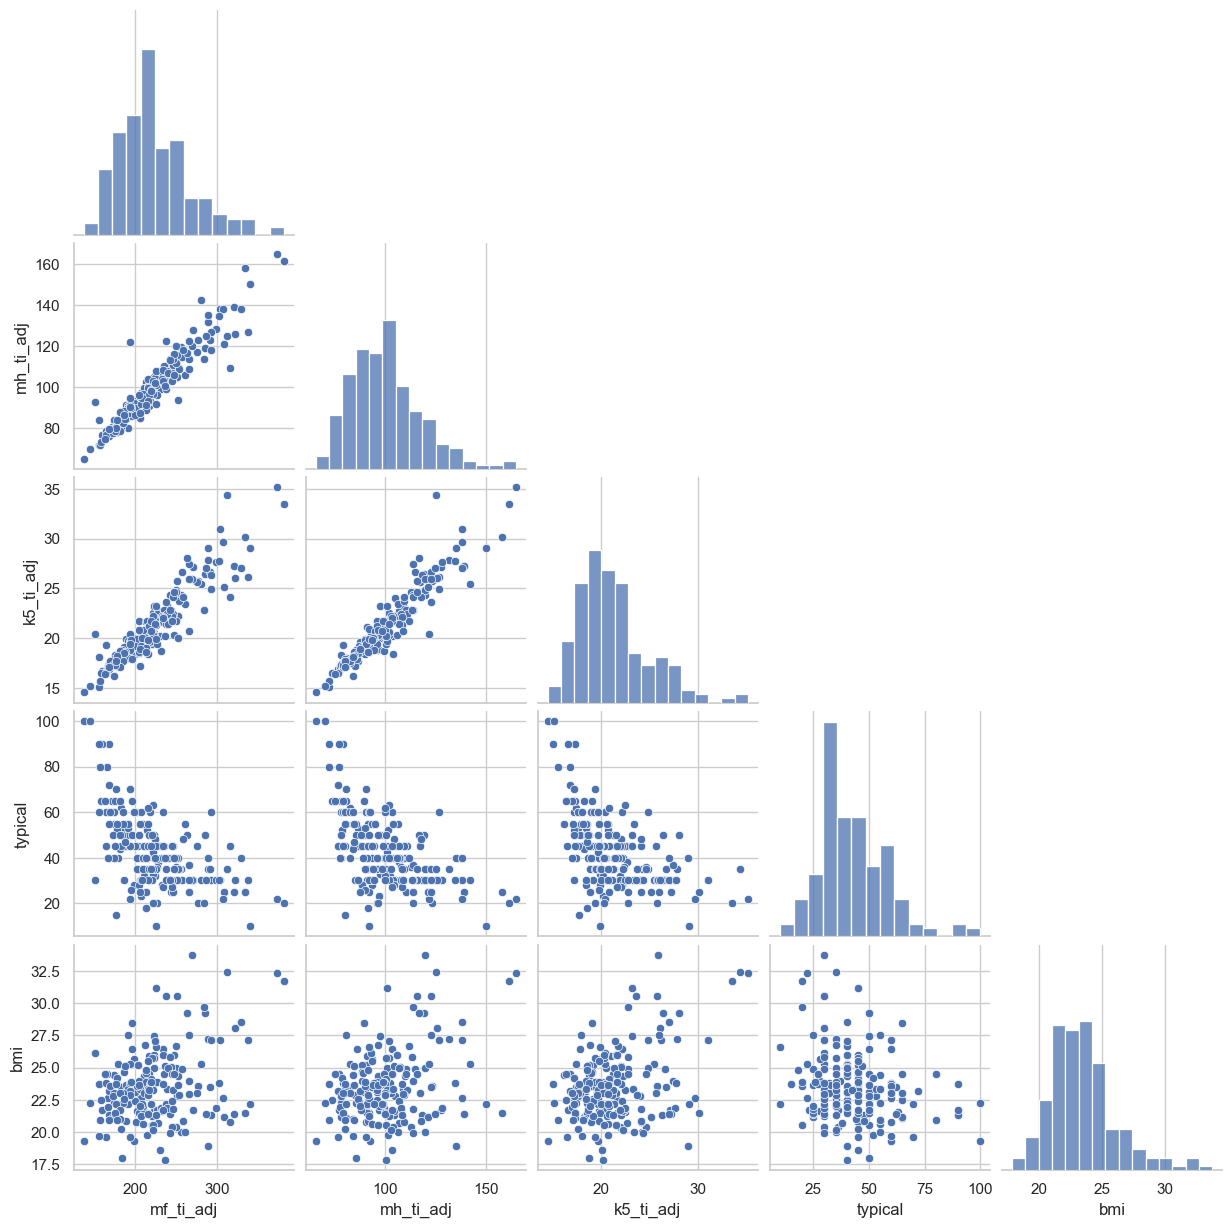

In [75]:
# Pairplot of the 4-5 most promising continuous features
top_features = ['mf_ti_adj', 'mh_ti_adj', 'k5_ti_adj', 'typical', 'bmi']
sns.pairplot(df[top_features].dropna(), corner=True)
plt.savefig('../results/figures/pairplot_top_features.png', dpi=150)

As expected, 5k and half marathon times have a tight positive linear correlation with marathon time, but also with eachother. Typical mileage has a negative linear correlation with marathon time, but the scatter plot shows some slight curvature and some clustering, along with what may be a few outliers. BMI/Marathon looks like a glob with a slight positive correlation. Interestingly enough, it seems to have a stronger association with typical mileage than with marathon time. Takeaways here are that races are great predictors with high multicolinearity, typical mileage is not as tightly associated with marathon time as I thought, but still has a visible negative linear relationship, and that BMI doesn't look like a very strong predictor.

### Violin Plot of top categorical features

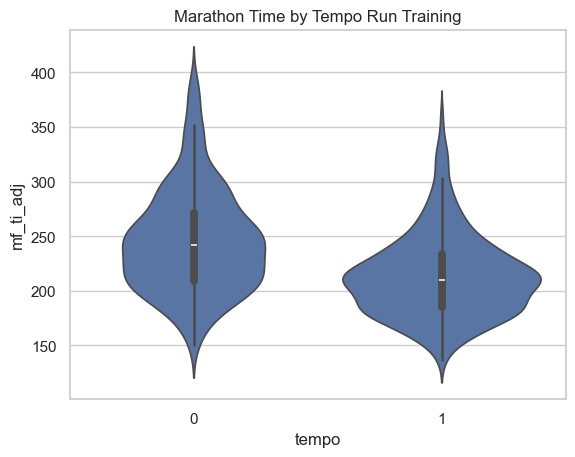

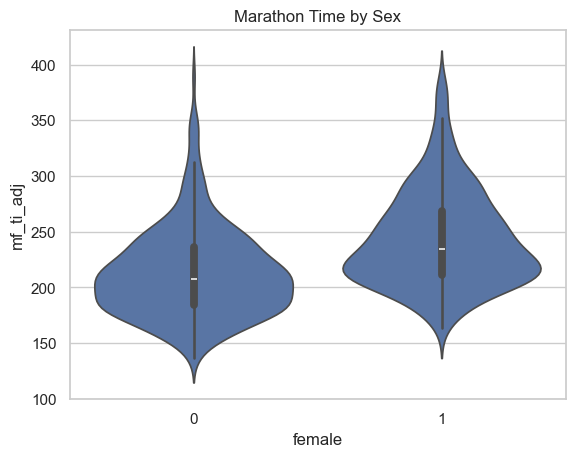

In [73]:
fig, ax = plt.subplots()
sns.violinplot(x='tempo', y='mf_ti_adj', data=df, ax=ax)
ax.set_title('Marathon Time by Tempo Run Training')
fig.savefig('../results/figures/violin_tempo_marathon.png', dpi=300, bbox_inches='tight')

fig, ax = plt.subplots()
sns.violinplot(x='female', y='mf_ti_adj', data=df, ax=ax)
ax.set_title('Marathon Time by Sex')
fig.savefig('../results/figures/violin_female_marathon.png', dpi=300, bbox_inches='tight')

Looking at these two plots gives me a fresh picture of tempo and sex as predictors. Runners who completed tempo runs had around the same range (~2:20-~5:00 tempo vs. ~2:30-~5:50 no tempo), but the upper tail of the tempo violin is very thin and the bulk of the data is very concentrated between 4:10 and 2:40. The same is not true for the non-tempo group, where the distribution is far more evenly spread and is concentrated between a much wider range (~3:00-~5:00). This makes me more confident in tempo as a predictor, as tempo runners group in a tigher 

This violin plot tells a slightly different story than the box plot I looked at earlier. Male runners have a much thinner upper tail than female runners, suggesting that male runners group in a tighter spread closer to the median. We can also see that ~50% of the male group is faster than ~75% of the female group, which is very significant. Sex is probably worth including in our model based off of these factors.

### EDA summary

The Vickers and Vertosick dataset has 493 useable datapoints (runners who ran a marathon and completed two other races), 6 features, and labeled results for each runner. This a modest but still workable amount of data and enough features to train a good model. Race times possess very strong predictive values but are also highly correlated, which could cause multicollinearity if I use a linear model. I could address these issues by using lasso/ridge to regularize, dropping one of the redundant races, or by using a tree-based model. All of those solutions have pros and cons which I should address when I select a model.

Given that the issue of redundancy is solveable, I can move forward with this dataset. It's not much, but it's a start.



---
## Part 3: Afonseca et al. Training Dataset — Profile

Quick look at the large-scale training data

In [86]:
# Load from afonseca 2019 weekly
af = pd.read_parquet('../data/raw/afonseca/run_ww_2019_w.parquet')
print(f'Shape: {af.shape}')
print(af.dtypes)
af.head(5)

Shape: (1893424, 8)
datetime     datetime64[ns]
athlete               int64
distance            float64
duration            float64
gender                  str
age_group               str
country                 str
major                   str
dtype: object


,datetime,athlete,distance,duration,gender,age_group,country,major
0,2019-01-01,0,0.00,0.00,F,18 - 34,United States,CHICAGO 2019
1,2019-01-01,1,5.27,30.20,M,35 - 54,Germany,BERLIN 2016
2,2019-01-01,2,9.30,98.00,M,35 - 54,United Kingdom,"LONDON 2018,LONDON 2019"
3,2019-01-01,3,103.13,453.40,M,18 - 34,United Kingdom,LONDON 2017
4,2019-01-01,4,34.67,185.65,M,35 - 54,United States,BOSTON 2017


In [88]:
af.describe()

,datetime,athlete,distance,duration
count,1893424,1.893424e+06,1.893424e+06,1.893424e+06
mean,2019-06-28 12:00:00.000000256,1.878141e+04,2.924142e+01,1.605819e+02
min,2019-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2019-03-31 06:00:00,9.428750e+03,1.630000e+00,1.075000e+01
50%,2019-06-28 12:00:00,1.879250e+04,2.160000e+01,1.229167e+02
75%,2019-09-25 18:00:00,2.810325e+04,4.618000e+01,2.545500e+02
max,2019-12-24 00:00:00,3.759800e+04,7.111400e+02,8.239200e+03
std,NaN,1.081663e+04,3.010521e+01,1.665210e+02


In [92]:
# How many athletes, how many have marathon participation?
print(f'Unique athletes: {af["athlete"].nunique()}')
print(f'# of unique athletes with marathon participation: {af[af["major"].notna()]["athlete"].nunique()}')


Unique athletes: 36412
# of unique athletes with marathon participation: 36412


Cool, all athletes have marathon participation. Theres also 36k athletes in this dataset, and we have weekly training volume over time aswell.

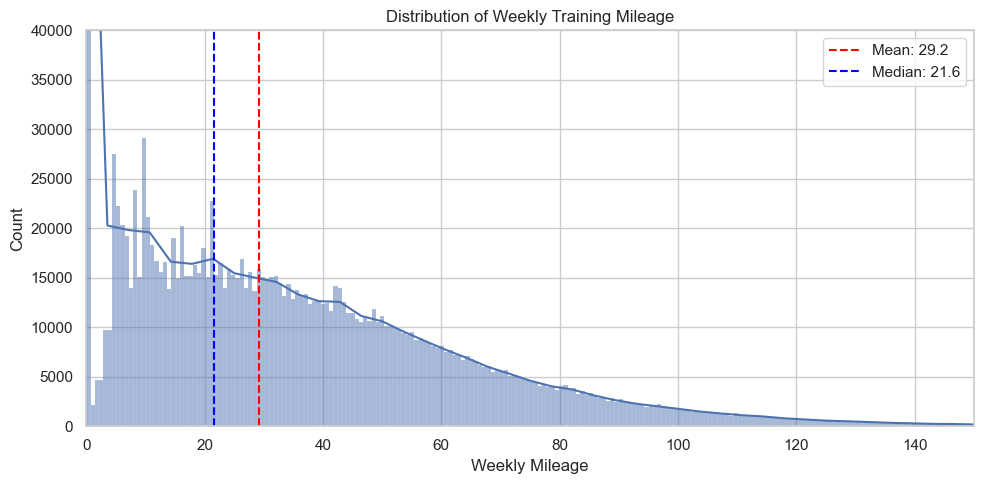

In [101]:
# Distribution of weekly training distance
weekly_mean_val = round(af["distance"].mean(), 1)
weekly_median_val = round(af["distance"].median(), 1)

fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(af["distance"], kde=True, ax=ax)
plt.axvline(af["distance"].mean(), color='red', linestyle="--", label=f'Mean: {weekly_mean_val}')
plt.axvline(af["distance"].median(), color='blue', linestyle="--", label=f'Median: {weekly_median_val}')
plt.legend()
ax.set_xlabel('Weekly Mileage')
ax.set_title('Distribution of Weekly Training Mileage')
ax.set_xlim(0, 150)
ax.set_ylim(0, 40000)
plt.tight_layout()
plt.savefig('../results/figures/weekly_mileage_dist_afonseca.png', dpi=150)

Weekly training distance has an interesting distribution. I had to clip axes because there were hundreds of thousands of weeks with 0 mileage, and also a a max value of 711 miles ran in a week by one runner. The first makes sense, the second is a data quality issue. If we ignore the spike at 0 miles and the impossible outliers for a moment, we can observe a pretty typical distribution of weekly mileage. Its still kind of messy, so lets average out athlete's weekly mileage across all their training, and then plot that.

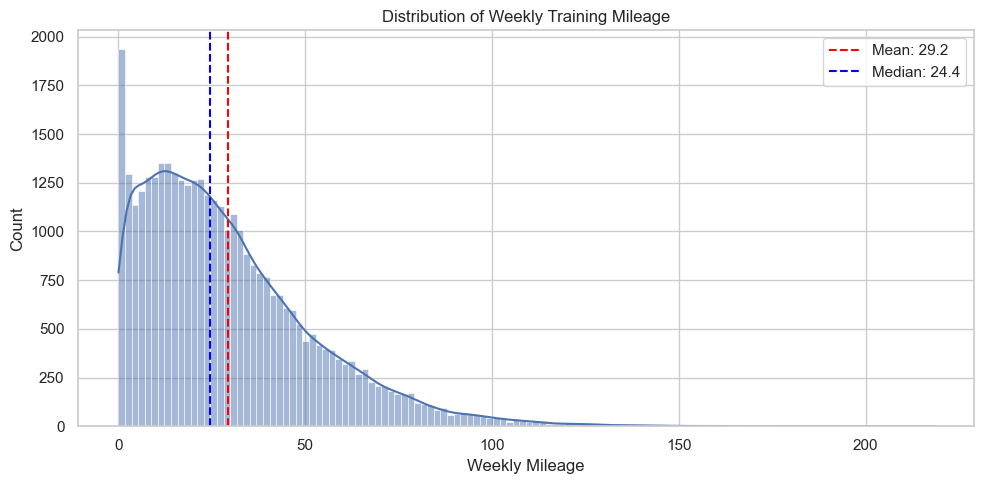

In [ ]:
typical_af = af.groupby('athlete')['distance'].mean().reset_index()

# Distribution of typical training distance
weekly_mean_val = round(typical_af["distance"].mean(), 1)
weekly_median_val = round(typical_af["distance"].median(), 1)

fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(typical_af["distance"], kde=True, ax=ax)
plt.axvline(typical_af["distance"].mean(), color='red', linestyle="--", label=f'Mean: {weekly_mean_val}')
plt.axvline(typical_af["distance"].median(), color='blue', linestyle="--", label=f'Median: {weekly_median_val}')
plt.legend()
ax.set_xlabel('Weekly Mileage')
ax.set_title('Distribution of Weekly Training Mileage')
plt.tight_layout()
plt.savefig('../results/figures/typical_mileage_dist_afonseca.png', dpi=150)

This is much more approachable. There are still obviously some extreme outliers, but with some cleaning this is a distribution we could work with.

### Key limitation

The issue with this dataset is that athlete marathon times are not given. It does list the marathons that athletes competed in, but the athletes themselves are anonymized. This means that scraping their results would be very difficult, as we would need some criteria with which to match athletes in this dataset with athletes in the marathon results.

For each athlete I have age range, gender, country, and the name of the major they competed in. This is not enough to match off, which is a shame because this dataset is much larger and richer than the Vickers et al. one. 

What I could do is:
1. build a preliminary model based off of the Vickers et al. data and 
2. use that to predict these athlete's marathon times 
3. use some form of probabalistic matching to connect athletes to their real marathon times with range, gender, country, and the name of the major to help filter
4. then train a new model off of the Afonseca et al. data with the athlete's marathon times

Whether I do this or not, then next step is to start modeling with the Vickers et al. data. 